In [ ]:
# https://gymnasium.farama.org/environments/toy_text/blackjack/
!pip install "gymnasium"
import gymnasium as gym
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt



412
Actual: 412 Accion: 0 Recompensa: -1 Fin: False Estado siguiente: 412


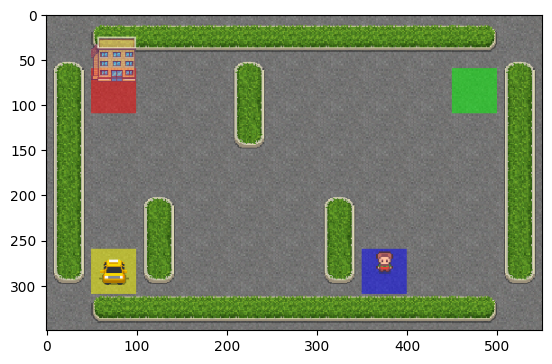

In [ ]:
env = gym.make('Taxi-v3', render_mode='rgb_array')
obs, info=env.reset()
print(obs)
#Estado: There are 500 discrete states since there are 25 taxi positions, 5 possible locations of the passenger (including the case when the passenger is in the taxi), and 4 destination locations.
#Acciones: 0: Move south (down), 1: Move north (up), 2: Move east (right), 3: Move west (left), 4: Pickup passenger, 5: Drop off passenger
#Cálculo del estado: ((taxi_row * 5 + taxi_col) * 5 + passenger_location) * 4 + destination
#Ensayando varias acciones:
accion=0
next_obs, reward, terminated, truncated, info = env.step(accion)#up
print('Actual:',obs, 'Accion:',accion, 'Recompensa:',reward, 'Fin:',terminated or truncated, 'Estado siguiente:',next_obs)

plt.imshow(env.render())


In [ ]:
from collections import defaultdict

class TaxiAgent:
    def __init__(
        self,
        env: gym.Env,
        learning_rate: float,
        initial_epsilon: float,
        epsilon_decay: float,
        final_epsilon: float,
        discount_factor: float = 0.95,
    ):
        self.env = env

        # Tabla Q, la definición por defecto crea una entrada de ceros
        self.q_values = defaultdict(lambda: np.zeros(env.action_space.n))

        self.lr = learning_rate
        self.discount_factor = discount_factor

        # Parámetros de exploración
        self.epsilon = initial_epsilon
        self.epsilon_decay = epsilon_decay
        self.final_epsilon = final_epsilon

        # Registro del error
        self.training_error = []

    def get_action(self, obs: int) -> int:
        # Método epsilon greedy para encontrar la acción
        if np.random.random() < self.epsilon:
            return self.env.action_space.sample()
        else:
            return int(np.argmax(self.q_values[obs]))

    def update(
        self,
        obs: int,
        action: int,
        reward: float,
        terminated: bool,
        next_obs: int,
    ):
        #El futuro valor es 0 si ya terminó o el valor mejor del siguiente estado
        future_q_value = (not terminated) * np.max(self.q_values[next_obs])
        #El nuevo valor actualizado de la Q
        target = reward + self.discount_factor * future_q_value
        #Diferencia temporal entre lo actual y lo existente
        temporal_difference = target - self.q_values[obs][action] #c
        self.q_values[obs][action] = self.q_values[obs][action] + self.lr * temporal_difference
        #Almacenamiento del error en este aprendizaje
        self.training_error.append(temporal_difference)

    def decay_epsilon(self):
        self.epsilon = max(self.final_epsilon, self.epsilon*self.epsilon_decay)

In [ ]:
# Training hyperparameters
learning_rate = 0.1        # Tasa de aprendizaje
n_episodes = 1000000          # Numero de iteraciones
start_epsilon = 1.0         # Probabilidad de explorar al inicio
final_epsilon = 0.1         # Tasa mínima de exploración
epsilon_decay = np.pow(final_epsilon/start_epsilon, 1/n_episodes)  # Reducción de la exploración

# Create environment and agent

agent = TaxiAgent(
    env=env,
    learning_rate=learning_rate,
    initial_epsilon=start_epsilon,
    epsilon_decay=epsilon_decay,
    final_epsilon=final_epsilon,
)

In [ ]:
from tqdm import tqdm

for episode in tqdm(range(n_episodes)):
    # Comienza de nuevo
    obs, info = env.reset()
    done = False

    # Juega un trayecto completo
    while not done: #Puede limitarse también por número de iteraciones
        # Se elige una acción
        action = agent.get_action(obs)

        # Ejecuta la acción y recibe la información
        next_obs, reward, terminated, truncated, info = env.step(action)

        # Aprende: actualiza la matriz Q
        agent.update(obs, action, reward, terminated, next_obs)

        # Cambia de estado
        done = terminated or truncated
        obs = next_obs

    # Reduce exploration rate (agent becomes less random over time)
    agent.decay_epsilon()

100%|██████████| 1000000/1000000 [28:02<00:00, 594.36it/s]


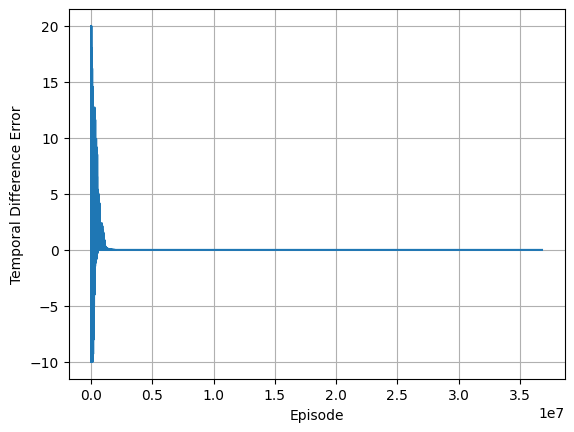

In [ ]:
plt.plot(agent.training_error)
plt.xlabel('Episode')
plt.ylabel('Temporal Difference Error')
plt.grid()

In [ ]:
#0: Move up
#1: Move right
#2: Move down
#3: Move left
agent.q_values

defaultdict(<function __main__.BJAgent.__init__.<locals>.<lambda>()>,
            {417: array([ 5.20997639,  6.53681725,  5.20997639,  5.20997639, -3.79002361,
                     3.94947757]),
             409: array([ 3.94947757,  2.75200369,  3.94947757,  3.94947757,  5.20997639,
                    -5.05052243]),
             317: array([ 5.20997639,  7.93349184,  6.53681725,  6.53681725, -2.46318275,
                    -2.46318275]),
             217: array([ 6.53681725,  6.53681725,  9.40367562,  7.93349184, -1.06650816,
                    -1.06650816]),
             117: array([ 7.93349184,  5.20997639,  7.93349184,  6.53681725, -2.46318275,
                    -2.46318275]),
             309: array([ 3.94947757,  1.61440351,  2.75200369,  2.75200369, -6.24799631,
                    -6.24799631]),
             209: array([ 2.75200369,  0.53368333,  0.53368333,  1.61440351, -7.38559649,
                    -7.38559649]),
             229: array([-0.49300084, -0.49300084, -0.4

In [ ]:
st, info=env.reset()
import imageio
frames = []

states=[st]
flag=True
contador=0
while(flag and contador<100):
  out=agent.q_values[st]
  action=np.argmax(out)
  observation, reward, terminated, truncated, info = env.step(action)
  fr=env.render()
  frames.append(fr)
  if terminated or truncated:
    flag=False
  states.append(observation)
  st=observation
  contador+=1
print('Camino desarrollado:',states)
env.render()
output_path = "animacion.mp4"
imageio.mimsave(output_path, frames, fps=2)

Camino desarrollado: [26, 126, 226, 246, 146, 46, 66, 86, 98, 198, 298, 278, 258, 238, 218, 318, 418, 410]


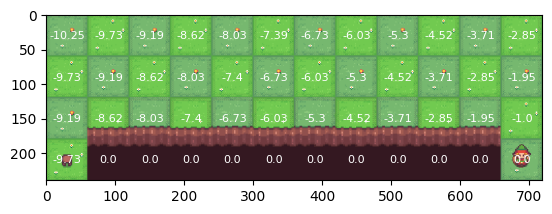

In [ ]:
#Valores de V(s)
import matplotlib.pyplot as plt
plt.imshow(env.render())
for s in range(48):
  col= s % 12
  row= int(s/12)
  x=col*60+30
  y=row*60+30
  val=np.round(np.max(agent.q_values[s]),2)
  plt.text(x,y,str(val), fontsize=8, ha='center', va='center', color='w')
